# Cruce de rectas

Considere las siguientes dos ecuaciones:

$
\begin{matrix}
a_{00} x_0 + a_{01} x_1 & = &b_0 \\
a_{01} x_0 + a_{11} x_1 & = &b_1
\end{matrix}
$

Estas ecuaciones representan dos líneas rectas en el plano Cartesiano. En forma matricial se escriben como:

$
\left[
\begin{array}{cccc}
a_{00} & a_{01} \\
a_{01} & a_{11}
\end{array} \right] 
\left[
\begin{array}{cccc}
x_{0} \\
x_{1}
\end{array} \right] 
=
\left[
\begin{array}{c}
b_0 \\ b_1
\end{array}
\right]
$

Para encontrar el punto de cruce de las dos rectas debemos resolver el sistema de ecuaciones.

## Ejemplo: 
$
\begin{array}{ccc}
3x_0 + 2x_1 & = &2 \\
2x_0 + 6x_1 & = &-8
\end{array} \Longrightarrow
\left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array} \right]
\left[
\begin{array}{cccc}
x_{0} \\
x_{1}
\end{array} \right] 
=
\left[
\begin{array}{c}
2\\ -8
\end{array}
\right]
$

Las ecuaciones se pueden escribir como:

$
\begin{array}{ccc}
\dfrac{3}{2}x_0 + x_1 & = & \dfrac{2}{2} \\
\dfrac{2}{6}x_0 + x_1 & = & -\dfrac{8}{6}
\end{array} \Longrightarrow
\begin{array}{ccc}
y_0 = m_0 x + b_0 \\
y_1 = m_1 x + b_1
\end{array} \text{ donde }
\begin{array}{ccc}
m_0 = -\dfrac{3}{2} & b_0 = 1 \\
m_1 = -\dfrac{2}{6} & b_1 = -\dfrac{8}{6}
\end{array}
$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.style.use(['seaborn'])
mpl.rcParams['figure.titlesize'] = 24
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.titlecolor'] = 'blue'
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['lines.linewidth'] = 3.0
mpl.rcParams['scatter.edgecolors'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.edgecolor'] = 'black'

**Gráficas de las rectas**

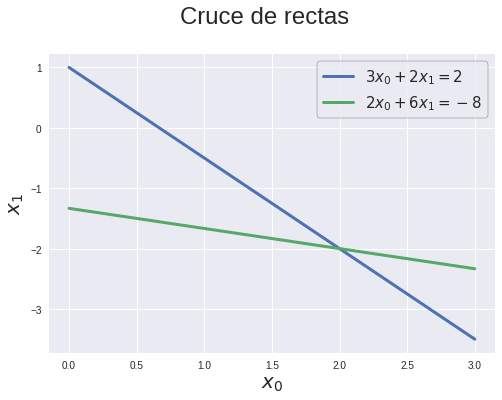

In [73]:
# Parámetros de las rectas
m0 = -3/2
b0 = 1
m1 = -2/6
b1 = -8/6

# Ecuciones de las rectas
x = np.linspace(0,3,10)
y0 = m0 * x + b0
y1 = m1 * x + b1

#Gráficas
plt.plot(x,y0,label = '$3x_0+2x_1=2$')
plt.plot(x,y1,label = '$2x_0+6x_1=-8$')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.suptitle('Cruce de rectas', y=1)
plt.grid(c='w')
plt.legend()
plt.savefig('cruceRectas.pdf')

**Solución del sistema lineal**

In [3]:
A = np.matrix([[3, 2],[2,6]] )
b = np.array([2,-8])
print("Matriz A : \n",A)
print("Vector b : \n", b)
sol = np.linalg.solve(A,b)
print("Solución del sistema : \n", sol)

Matriz A : 
 [[3 2]
 [2 6]]
Vector b : 
 [ 2 -8]
Solución del sistema : 
 [ 2. -2.]


**Gráfica de la solución**

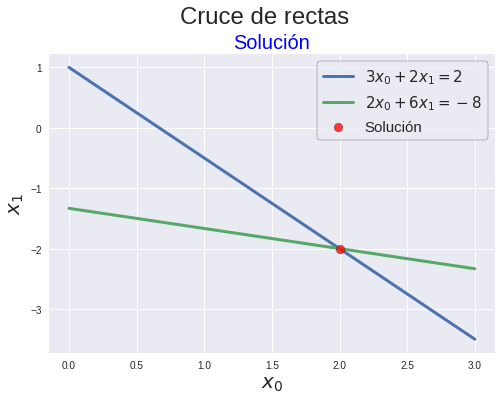

In [92]:
plt.plot(x,y0,label = '$3x_0+2x_1=2$')
plt.plot(x,y1,label = '$2x_0+6x_1=-8$')
plt.scatter(sol[0], sol[1], c='red', s = 75, alpha=0.75, zorder=5, label='Solución')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.suptitle('Cruce de rectas', y=1)
plt.title('Solución')
plt.grid(color='white')
plt.legend()
plt.savefig('cruceRectasSolucion.pdf')

In [59]:
def grafica(x, y0, y1, xini, sol, titulo):
    plt.plot(x,y0,label = '$3x_0+2x_1=2$')
    plt.plot(x,y1,label = '$2x_0+6x_1=-8$')
    plt.scatter(xini[0][0], xini[1][0], c='yellow', s=75, alpha=0.95, zorder=5, label='Inicio')
    plt.scatter(sol[0], sol[1], c='red', s=75, alpha=0.75, zorder=5, label='Solución')
    plt.plot(xini[0], xini[1], 'k.--', lw=1.0, zorder=6, label='Aproximación')
    plt.xlabel('$x_0$')
    plt.ylabel('$x_1$')
    plt.suptitle('Cruce de rectas', y=1)
    plt.title(titulo, color='blue')
    plt.grid(color='white')
    plt.legend()

# Jacobi

In [83]:
def jacobi(A,b,tol,kmax,xini):
    N = len(b)
    xnew = np.zeros(N)
    xold = np.zeros(N)
    
    # Solución inicial
    xold[0] = xini[0][0]
    xold[1] = xini[1][0]
    
    error = 10
    k = 0
    print('{:^2} {:^10} {:^12} {:^12}'.format(' i ', 'Error', 'x0', 'x1'))
    while(error > tol and k < kmax) :
        for i in range(0,N): # se puede hacer en paralelo
            xnew[i] = 0
            for j in range(0,i):
                xnew[i] += A[i,j] * xold[j]
            for j in range(i+1,N):
                xnew[i] += A[i,j] * xold[j]                
            xnew[i] = (b[i] - xnew[i]) / A[i,i]
        
        # Almacenamos la solución actual
        xini[0].append(xnew[0])
        xini[1].append(xnew[1])
        
        error = np.linalg.norm(xnew-xold)
        k += 1
        xold[:] = xnew[:]
        print('{:2d} {:10.9f} ({:10.9f}, {:10.9f})'.format(k, error, xnew[0], xnew[1]))
    return xnew, error, k

In [84]:
xini = [[0],[0]]
sol, e, it = jacobi(A,b,1e-5,100, xini)

 i    Error         x0           x1     
 1 1.490711985 (0.666666667, -1.333333333)
 2 0.916245695 (1.555555556, -1.555555556)
 3 0.331269330 (1.703703704, -1.851851852)
 4 0.203610154 (1.901234568, -1.901234568)
 5 0.073615407 (1.934156379, -1.967078189)
 6 0.045246701 (1.978052126, -1.978052126)
 7 0.016358979 (1.985368084, -1.992684042)
 8 0.010054822 (1.995122695, -1.995122695)
 9 0.003635329 (1.996748463, -1.998374232)
10 0.002234405 (1.998916154, -1.998916154)
11 0.000807851 (1.999277436, -1.999638718)
12 0.000496534 (1.999759145, -1.999759145)
13 0.000179522 (1.999839430, -1.999919715)
14 0.000110341 (1.999946477, -1.999946477)
15 0.000039894 (1.999964318, -1.999982159)
16 0.000024520 (1.999988106, -1.999988106)
17 0.000008865 (1.999992071, -1.999996035)


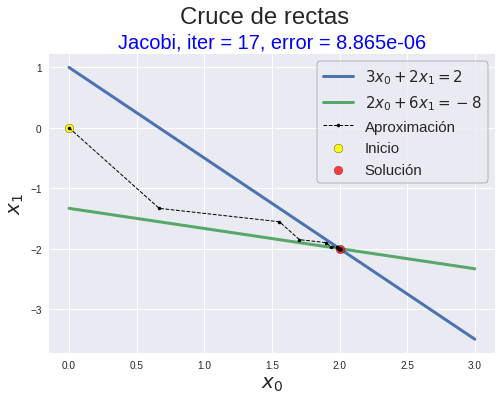

In [85]:
grafica(x, y0, y1, xini, sol, 'Jacobi, iter = {}, error = {:4.3e}'.format(it, e) )
plt.savefig('Jacobi.pdf')

# Gauss-Seidel

In [86]:
def gauss_seidel(A,b,tol,kmax,xini):
    N = len(b)
    xnew = np.zeros(N)
    xold = np.zeros(N)
    
    # Solución inicial
    xold[0] = xini[0][0]
    xold[1] = xini[1][0]
    
    error = 10
    k = 0
    print('{:^2} {:^10} {:^12} {:^12}'.format(' i ', 'Error', 'x0', 'x1'))
    while(error > tol and k < kmax) :
        for i in range(0,N): # se puede hacer en paralelo
            xnew[i] = 0
            for j in range(0,i):
                xnew[i] += A[i,j] * xnew[j]
            for j in range(i+1,N):
                xnew[i] += A[i,j] * xold[j]                
            xnew[i] = (b[i] - xnew[i]) / A[i,i]
            
        # Almacenamos la solución actual
        xini[0].append(xnew[0])
        xini[1].append(xnew[1])
        
        error = np.linalg.norm(xnew-xold)
        k += 1
        xold[:] = xnew[:]
        print('{:2d} {:10.9f} ({:10.9f}, {:10.9f})'.format(k, error, xnew[0], xnew[1]))
    return xnew, error, k

In [87]:
xini = [[0], [0]]
sol, e, it = gauss_seidel(A,b,1e-5,100, xini)

 i    Error         x0           x1     
 1 1.692394024 (0.666666667, -1.555555556)
 2 1.093133018 (1.703703704, -1.901234568)
 3 0.242918449 (1.934156379, -1.978052126)
 4 0.053981877 (1.985368084, -1.995122695)
 5 0.011995973 (1.996748463, -1.998916154)
 6 0.002665772 (1.999277436, -1.999759145)
 7 0.000592394 (1.999839430, -1.999946477)
 8 0.000131643 (1.999964318, -1.999988106)
 9 0.000029254 (1.999992071, -1.999997357)
10 0.000006501 (1.999998238, -1.999999413)


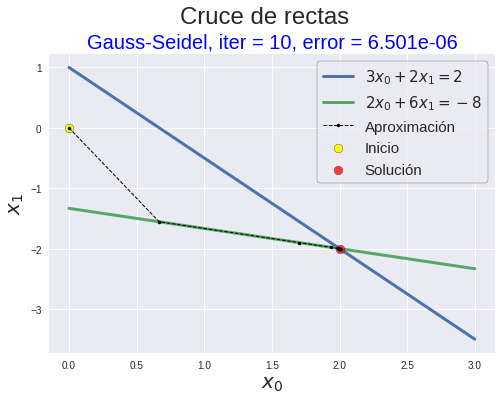

In [88]:
grafica(x, y0, y1, xini, sol, 'Gauss-Seidel, iter = {}, error = {:4.3e}'.format(it,e))
plt.savefig('Gauss-Seidel.pdf')

# SOR: *successive overrelaxation*

In [89]:
def sor(A,b,tol,kmax,w,xini):
    N = len(b)
    xnew = np.zeros(N)
    xold = np.zeros(N)
    
    # Solución inicial
    xold[0] = xini[0][0]
    xold[1] = xini[1][0]  
    
    error = 10
    k = 0
    print('{:^2} {:^10} {:^12} {:^12}'.format(' i ', 'Error', 'x0', 'x1'))
    while(error > tol and k < kmax) :
        for i in range(0,N): # se puede hacer en paralelo
            sigma = 0
            for j in range(0,i):
                sigma += A[i,j] * xnew[j]
            for j in range(i+1,N):
                sigma += A[i,j] * xold[j]                
            sigma = (b[i] - sigma) / A[i,i]
            xnew[i] = xold[i] + w * (sigma -xold[i])

        # Almacenamos la solución actual
        xini[0].append(xnew[0])
        xini[1].append(xnew[1])
        
        error = np.linalg.norm(xnew-xold)
        k += 1
        xold[:] = xnew[:]
        print('{:2d} {:10.9f} ({:10.9f}, {:10.9f})'.format(k, error, xnew[0], xnew[1]))
    return xnew, error, k

In [103]:
xini = [[0],[0]]
w = 2.00 # optimo 1.09
sol, e, it = sor(A,b,1e-5,100,w, xini)

 i    Error         x0           x1     
 1 3.797334998 (1.333333333, -3.555555556)
 2 3.641284722 (4.740740741, -2.271604938)
 3 5.544371883 (-0.378600823, -0.142661180)
 4 4.303517077 (1.902149063, -3.792104862)
 5 3.223752706 (4.487324087, -1.866111196)
 6 5.369689681 (-0.665842492, -0.356660476)
 7 4.779740846 (2.474723127, -3.959821609)
 8 2.998011383 (4.138372351, -1.465759959)
 9 5.057960103 (-0.850692406, -0.633778437)
10 5.170933247 (3.029063656, -4.052264000)
11 3.042882947 (3.707288344, -1.085928230)
12 4.634959649 (-0.926050705, -0.963371300)
13 5.441125036 (3.543879106, -4.065881437)
14 3.341336486 (3.210629477, -0.741204881)
15 4.142114323 (-0.889022968, -1.332779807)
16 5.568797800 (3.999396044, -4.000150889)
17 3.796620411 (2.667471809, -0.444830316)
18 3.641969910 (-0.741031387, -1.727815426)
19 5.544516778 (4.378118621, -3.857596988)
20 4.302794324 (2.098677363, -0.208187921)
21 3.224241918 (-0.487760136, -2.133305322)
22 5.370044041 (4.665500565, -3.643695055)
23 4.7

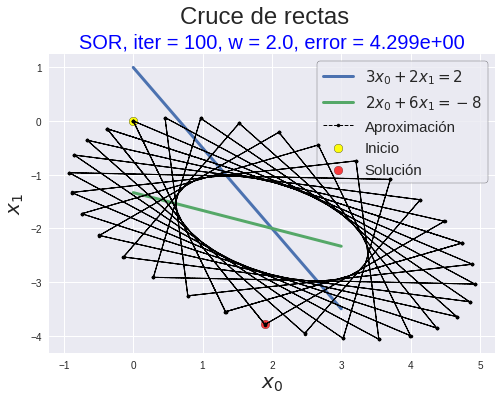

In [104]:
grafica(x, y0, y1, xini, sol, 'SOR, iter = {}, w = {}, error = {:4.3e}'.format(it, w,e))
plt.savefig('SOR.pdf')